In [1]:
from __future__ import print_function

import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.Session(config=config)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


"""
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,TimeDistributed
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import layers,models
import h5py
from keras.models import Model
from keras.layers import Layer
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import heapq
import warnings
warnings.filterwarnings('ignore')
"""

import tensorflow.keras as keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten,TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras import layers,models
import h5py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import heapq
import warnings
warnings.filterwarnings('ignore')


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5110120088493713051
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3848137969199913715
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6828034791225895395
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2756771840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10700593069547327291
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Using TensorFlow backend.


In [6]:
import random
batch_size = 1
num_classes = 2
epochs = 1

# input image dimensions
img_rows, img_cols = 128, 128

# the data, split between train and test sets

#(x_train, y_train), (x_test, y_test) = mnist.load_data()


p='2548_many_2.h5';

db=h5py.File(p);


X_stk, y_stk = db['images'],db['labels'];

X =np.zeros((91,28,128,128,3))
y = np.zeros((91,))

for ij in range(91):
    X[ij,...] = X_stk[ij*28:(ij+1)*28,...]
    y[ij,...] = y_stk[(ij*28+(ij+1)*28)//2]

print(X.shape)
print(y.shape)
# Split train and valid

total_size = X.shape[0];
index_random = np.arange(total_size)
i = int(X.shape[0] * 3/4)

random.shuffle(index_random)

train_index = list(index_random[:i]) ;
test_index = list(index_random[i:]) ;
train_index.sort()
test_index.sort()
# Split train and valid

#i = int(db["images"].shape[0] * 3/4)

x_train, x_test, y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index];

print(x_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)







class ScaleLayer(Layer):

    def __init__(self,scale, **kwargs):

        self.scale=scale;
        
        super(ScaleLayer, self).__init__(**kwargs)


    def build(self, input_shape):
        super(ScaleLayer, self).build(input_shape)

       
    def call(self, inputs):

        output=tf.image.resize(inputs,[self.scale,self.scale],method=tf.image.ResizeMethod.BICUBIC)

        print(output.shape)

        return output

       

    def compute_output_shape(self, input_shape):
        return (input_shape[0],self.scale,self.scale,3)





classes = 2;
pooling = 'No'
num_sequence = 28;
include_top = False;

input_shape =  [num_sequence,img_rows, img_cols, 3];


img_input = layers.Input(shape=input_shape)

#x = TimeDistributed(ScaleLayer(224))(img_input)

x = TimeDistributed(layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1'))(img_input)
x = TimeDistributed(layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2'))(x)

x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))(x)
# Block 2
x = TimeDistributed(layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1'))(x)

x = TimeDistributed(layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2'))(x)

#x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))(x)
#x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))(x)
#x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))(x)

x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))(x)

# Block 3
x = TimeDistributed(layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1'))(x)
x = TimeDistributed(layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2'))(x)
x = TimeDistributed(layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))(x)
"""
# Block 4
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))(x)

# Block 5
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv1'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv2'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv3'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))(x)
"""

if include_top:
    # Classification block
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    x = layers.Dense(classes, activation='softmax', name='predictions')(x)
else:
    if pooling == 'avg':
        x = layers.GlobalAveragePooling2D()(x)
    elif pooling == 'max':
        x = layers.GlobalMaxPooling2D()(x)
    elif pooling =='No':
        x = x;


# Ensure that the model takes into account
# any potential predecessors of `input_tensor`.
#if input_tensor is not None:
#    inputs = keras_utils.get_source_inputs(input_tensor)
#else:
inputs = img_input
# Create model.
base_model = models.Model(inputs, x, name='simple_cnn')

#weights ='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5';

#base_model.load_weights(weights)

class AttentionLayer(Layer):

    def __init__(self, **kwargs):

        
        super(AttentionLayer, self).__init__(**kwargs)


    def build(self, input_shape):
        super(AttentionLayer, self).build(input_shape)


        self.input_shape_r = input_shape;
        print('self.input_shape_r')
        print(self.input_shape_r)

        L_size = 256;

        self.w = self.add_weight(name='w', 
                              shape=[L_size,1],
                              initializer='uniform',
                              trainable=True)
        self.V = self.add_weight(name='V', 
                      shape=[input_shape[2],L_size],
                      initializer='uniform',
                      trainable=True)

        self.U = self.add_weight(name='U', 
                      shape=[input_shape[2],L_size],
                      initializer='uniform',
                      trainable=True)

        

        self.bias_w = self.add_weight(shape=[1,1],
                              initializer='uniform',
                              name='bias_w')
        self.bias_V = self.add_weight(shape=[1,L_size],
                                      initializer='uniform',
                                      name='bias_V')
        self.bias_U = self.add_weight(shape=[1,L_size],
                                      initializer='uniform',
                                      name='bias_U')
        
        self.Save = self.add_weight(name='ForSave', 
              shape=[10,10],
              initializer='uniform',
              trainable=False)
      

  
       
    def call(self, inputs):


        inputs_r = K.expand_dims(inputs,axis=-2)


        print('inputs')
        print(inputs_r.shape)


        dot_products_V = K.dot(inputs_r,self.V)
        dot_products_U = K.dot(inputs_r,self.U)

        dot_products_V += self.bias_V;
        dot_products_U += self.bias_U;


        print('dot product')
        print(dot_products_V.shape)

        tanh_V = K.tanh(dot_products_V);
        sigmoid_U = K.sigmoid(dot_products_U);

        print('tanh')
        print(tanh_V.shape)

        comb_UV = tanh_V*sigmoid_U;

        print('combUV')
        print(comb_UV.shape)

        attention_weights = K.dot(comb_UV,self.w);

        attention_weights +=self.bias_w;

        attention_weights = K.exp(attention_weights);


        print('attention_weights')
        print(attention_weights.shape)


        attention_weights /= K.cast(K.sum(attention_weights,
                                  axis=1,
                                  keepdims=True) + K.epsilon(),
                            K.floatx());
        print('attention_weights sum')
        print(attention_weights.shape)

        #attention_weights = K.expand_dims(attention_weights);
        attention_weights= K.squeeze(attention_weights,axis = -1);
        print('attention_weights last')
        print(attention_weights.shape)

        weighted_output = inputs * attention_weights;

        self.Save =  attention_weights;


        output = K.sum(weighted_output, axis=1)

        print('output')
        print(output.shape)

        return output


       

    def compute_output_shape(self, input_shape):
        return (input_shape[0],input_shape[2])






class FCHeadNet:
  @staticmethod
  def build(baseModel, classes, D):
    # initialize the head model that will be placed on top of
    # the base, then add a FC layer
    headModel = baseModel.output
    headModel = TimeDistributed(layers.Flatten(name='flatten'))(headModel)
    headModel = TimeDistributed(layers.Dense(D, activation='relu', name='fc1'))(headModel)
    headModel = TimeDistributed(layers.Dense(D, activation='relu', name='fc2'))(headModel)
    headModel = AttentionLayer(name='attentionlayer')(headModel)
    headModel = layers.Dense(classes, activation='softmax', name='predictions')(headModel)
    # add a softmax layer
    #headModel = layers.Dense(classes, activation="softmax")(headModel)
    #headModel = layers.Dense(classes, activation='softmax', name='predictions2')(headModel)

    # return the model
    return headModel


head_model = FCHeadNet.build(base_model, 2, 16)

model = Model(inputs=base_model.input, outputs=head_model)

Dont_Want_to_train_all = True;


if (Dont_Want_to_train_all):

  for layer in base_model.layers:
    layer.trainable = True


model.summary()

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

(91, 28, 128, 128, 3)
(91,)
(68, 28, 128, 128, 3)
self.input_shape_r
(None, 28, 16)
inputs
(None, 28, 1, 16)
dot product
(None, 28, 1, 256)
tanh
(None, 28, 1, 256)
combUV
(None, 28, 1, 256)
attention_weights
(None, 28, 1, 1)
attention_weights sum
(None, 28, 1, 1)
attention_weights last
(None, 28, 1)
output
(None, 16)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 128, 128, 3)] 0         
_________________________________________________________________
time_distributed_30 (TimeDis (None, 28, 128, 128, 64)  1792      
_________________________________________________________________
time_distributed_31 (TimeDis (None, 28, 128, 128, 64)  36928     
_________________________________________________________________
time_distributed_32 (TimeDis (None, 28, 64, 64, 64)    0         
_________________________________________________________________
time

In [61]:
from keras.applications.vgg16 import (
    VGG16, preprocess_input, decode_predictions)
from keras.preprocessing import image
from keras.layers.core import Lambda
from keras.models import Sequential
from tensorflow.python.framework import ops
import keras.backend as K
import tensorflow as tf
import numpy as np
import keras
import sys
import cv2


def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes))

def target_category_loss_output_shape(input_shape):
    return input_shape

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def load_image(path):
    img_path = sys.argv[1]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def register_gradient():
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                tf.cast(op.inputs[0] > 0., dtype)

def compile_saliency_function(model, activation_layer='block5_conv3'):
    input_img = model.input
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    layer_output = layer_dict[activation_layer].output
    max_output = K.max(layer_output, axis=3)
    saliency = K.gradients(K.sum(max_output), input_img)[0]
    return K.function([input_img, K.learning_phase()], [saliency])

def modify_backprop(model, name):
    g = tf.get_default_graph()
    with g.gradient_override_map({'Relu': name}):

        # get layers that have an activation
        layer_dict = [layer for layer in model.layers[1:]
                      if hasattr(layer, 'activation')]

        # replace relu activation
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu

        # re-instanciate a new model
        new_model = VGG16(weights='imagenet')
    return new_model

def deprocess_image(x):
    '''
    Same normalization as in:
    https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
    '''
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_dim_ordering() == 'th':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def grad_cam(input_model, image, category_index, layer_name):
    model = Sequential()
    model.add(input_model)

    nb_classes = 2
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    model.add(Lambda(target_layer,
                     output_shape = target_category_loss_output_shape))

    loss = K.sum(model.layers[-1].output)
    print('***')
    print(layer_name)
    print(model.layers)
    
    print(model.layers[0].layers)
    conv_output =  [l for l in model.layers[0].layers[1:-2] if l.layer.name is layer_name][0].output
    print('***')
    print(conv_output)
    #conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
    print('***')
    print(K.gradients(loss, conv_output)[0])
    
    grads = normalize(K.gradients(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap



image = x_train

#def my_decode_predictions(pred):
#    return []


predictions = model.predict(image)
#top_1 = my_decode_predictions(predictions)[0][0]
#print('Predicted class:')
#print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

predicted_class = np.argmax(predictions)
cam, heatmap = grad_cam(model, image, predicted_class, 'block3_conv3')
cv2.imwrite("gradcam.jpg", cam)

register_gradient()
guided_model = modify_backprop(model, 'GuidedBackProp')
saliency_fn = compile_saliency_function(guided_model)
saliency = saliency_fn([preprocessed_input, 0])
gradcam = saliency[0] * heatmap[..., np.newaxis]
cv2.imwrite("guided_gradcam.jpg", deprocess_image(gradcam))

inputs
(?, 10, 1, 16)
dot product
(?, 10, 1, 256)
tanh
(?, 10, 1, 256)
combUV
(?, 10, 1, 256)
attention_weights
(?, 10, 1, 1)
attention_weights sum
(?, 10, 1, 1)
attention_weights last
(?, 10, 1)
output
(?, 16)
***
block3_conv3
[<keras.engine.training.Model object at 0x7f0f4320cc88>, <keras.layers.core.Lambda object at 0x7f0d9f64a3c8>]
[<keras.engine.input_layer.InputLayer object at 0x7f0f4af9af28>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f4338e780>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f43393978>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f43393ac8>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f433747b8>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f4330fe80>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f433268d0>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f432dc9e8>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f4328db00>, <keras.layers.wrappers.TimeDistributed object at 0x7f0f432a90b8>, <ke

ValueError: Tried to convert 'x' to a tensor and failed. Error: None values not supported.

In [52]:
[l for l in model.layers[1:-2] if l.layer.name is 'block3_conv3'][0].output

<tf.Tensor 'time_distributed_54/Reshape_1:0' shape=(?, 10, 32, 32, 256) dtype=float32>

In [56]:
model.layers[1:-2]

In [37]:
model.layers[1:].layer.name

In [11]:
predictions.shape

(68, 2)

In [8]:
import cv2 

class GradCAM:
    def __init__(self, model, classIdx, layerName = None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            print(len(layer.output_shape))
            if len(layer.output_shape) == 5:
                print(layer.name)
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
    def compute_heatmap(self, image, eps=1e-8):
        from tensorflow.keras.models import Model
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap
    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [7]:
import cv2 

class GradCAM:
    def __init__(self, model, classIdx, layerName = None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            print(len(layer.output_shape))
            if len(layer.output_shape) == 5:
                print(layer.name)
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
    def compute_heatmap(self, image, eps=1e-8):
        from tensorflow.keras.models import Model
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (s,w, h,c) = (image.shape[1],image.shape[2],image.shape[3],image.shape[4])
        print('*')
        print(w)
        print(h)
        print(cam.numpy().shape)
        #heatmap = cv2.resize(cam.numpy(), (w, h))
        
        heat_final = np.zeros((s,w,h,c))
        cam_seq = cam.numpy()
        for seq in range(s):
        
            heatmap =cv2.resize(cam_seq[seq,...], (w, h))
        
            # normalize the heatmap such that all values lie in the range
            # [0, 1], scale the resulting values to the range [0, 255],
            # and then convert to an unsigned 8-bit integer
            numer = heatmap - np.min(heatmap)
            denom = (heatmap.max() - heatmap.min()) + eps
            heatmap = numer / denom
            heatmap = (heatmap * 255).astype("uint8")
            
            heatmap = heatmap[...,None];
            heatmap = np.concatenate([heatmap,heatmap,heatmap],axis=-1)
            # return the resulting heatmap to the calling function
            heat_final[seq,...] = heatmap
        
        return heat_final
    def overlay_heatmap(self, heatmap_seq, image_seq, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        
        (s,w,h,c) = heatmap_seq.shape;
        print(str(s)+','+str(w)+','+str(h))
        heat_final = np.zeros((s,w,h,c))
        output_final = np.zeros((s,w,h,c))
        for seq in range(s):
            heatmap = heatmap_seq[seq,...];
            image = image_seq[0,seq,...];
            heatmap = heatmap.astype("uint8")
            image = (image * 255).astype("uint8")
            print(image.shape)
            print(heatmap.shape)
            heatmap = cv2.applyColorMap(heatmap, colormap)
            print(heatmap.shape)
            output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
            
            # return a 2-tuple of the color mapped heatmap and the output,
            # overlaid image
            heat_final[seq,...] = heatmap
            output_final[seq,...] = output
        return (heat_final, output_final)

In [43]:
import cv2 

class GradCAM:
    def __init__(self, model, classIdx, layerName = None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        count = 0;
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            print(len(layer.output_shape))
            
            if len(layer.output_shape) == 5 and count ==5:
                print(layer.name)
                return layer.name
            
            if len(layer.output_shape) == 5:
                count = count+1;
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
    def compute_heatmap(self, image, eps=1e-8):
        from tensorflow.keras.models import Model
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (s,w, h,c) = (image.shape[1],image.shape[2],image.shape[3],image.shape[4])
        print('*')
        print(w)
        print(h)
        print(cam.numpy().shape)
        #heatmap = cv2.resize(cam.numpy(), (w, h))
        
        heat_final = np.zeros((s,w,h,c))
        cam_seq = cam.numpy()
        for seq in range(s):
        
            heatmap =cv2.resize(cam_seq[seq,...], (w, h))
        
            # normalize the heatmap such that all values lie in the range
            # [0, 1], scale the resulting values to the range [0, 255],
            # and then convert to an unsigned 8-bit integer
            numer = heatmap - np.min(heatmap)
            denom = (heatmap.max() - heatmap.min()) + eps
            heatmap = numer / denom
            heatmap = (heatmap * 255).astype("uint8")
            
            heatmap = heatmap[...,None];
            heatmap = np.concatenate([heatmap,heatmap,heatmap],axis=-1)
            # return the resulting heatmap to the calling function
            heat_final[seq,...] = heatmap
        
        return heat_final
    def overlay_heatmap(self, heatmap_seq, image_seq, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        
        (s,w,h,c) = heatmap_seq.shape;
        print(str(s)+','+str(w)+','+str(h))
        heat_final = np.zeros((s,w,h,c))
        output_final = np.zeros((s,w,h,c))
        for seq in range(s):
            heatmap = heatmap_seq[seq,...];
            image = image_seq[0,seq,...];
            heatmap = heatmap.astype("uint8")
            image = (image * 255).astype("uint8")
            print(image.shape)
            print(heatmap.shape)
            heatmap = cv2.applyColorMap(heatmap, colormap)
            print(heatmap.shape)
            output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
            
            # return a 2-tuple of the color mapped heatmap and the output,
            # overlaid image
            heat_final[seq,...] = heatmap
            output_final[seq,...] = output
        return (heat_final, output_final)

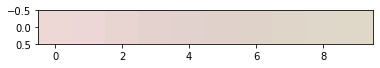

In [14]:
plt.imshow(heatmap)

In [6]:
image.shape

(1, 10, 128, 128, 3)

In [7]:
heatmap.shape

(1, 10, 4)

(128, 128, 3)


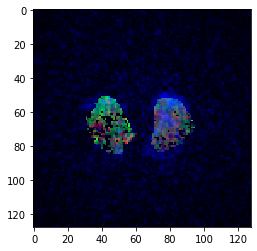

(128, 128, 3)


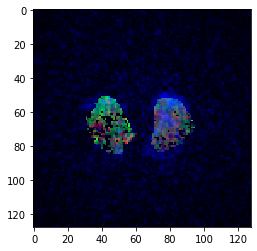

(128, 128, 3)


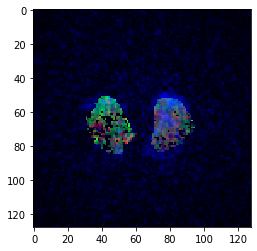

(128, 128, 3)


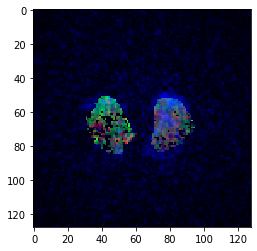

(128, 128, 3)


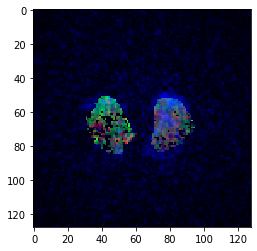

(128, 128, 3)


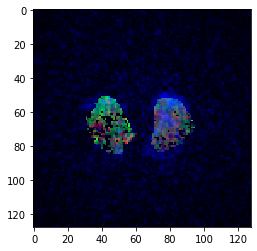

(128, 128, 3)


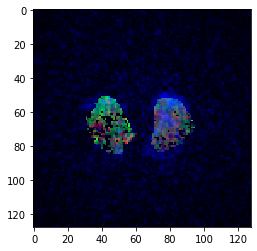

(128, 128, 3)


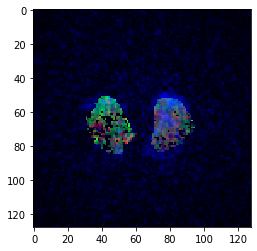

(128, 128, 3)


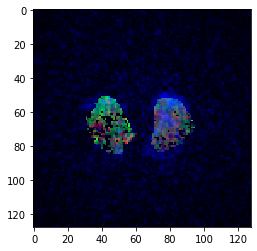

(128, 128, 3)


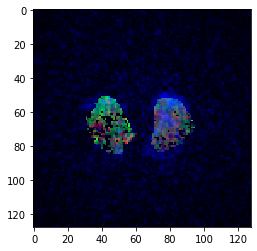

In [8]:
image = x_test[20,:,:,:]

for i in range(10):
    img= image[i,...]
    print(img.shape)
    img = (img * 255).astype("uint8")
    plt.imshow(img)
    plt.show()

2
2
3
3
3
5
5
5
5
5
5
time_distributed_36
inputs
(1, 28, 1, 16)
dot product
(1, 28, 1, 256)
tanh
(1, 28, 1, 256)
combUV
(1, 28, 1, 256)
attention_weights
(1, 28, 1, 1)
attention_weights sum
(1, 28, 1, 1)
attention_weights last
(1, 28, 1)
output
(1, 16)
*
128
128
(28, 32, 32)
image shape
(1, 28, 128, 128, 3)
28,128,128
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 12

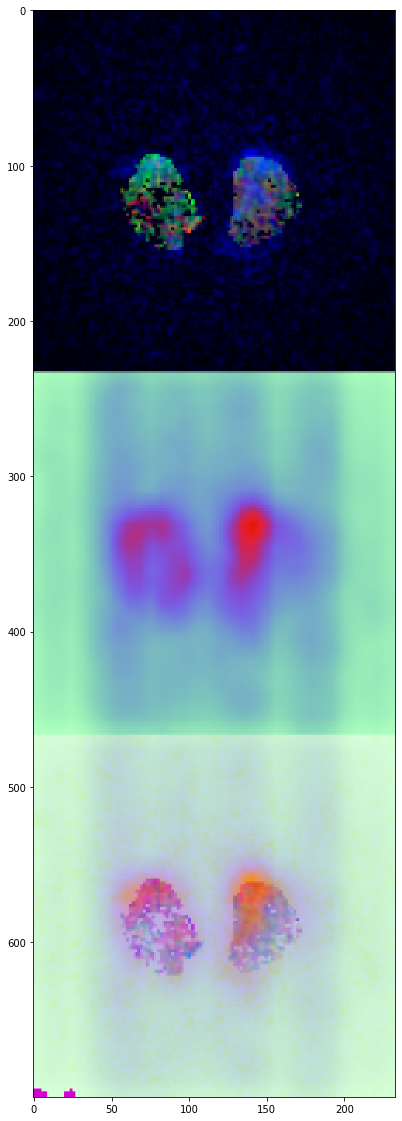

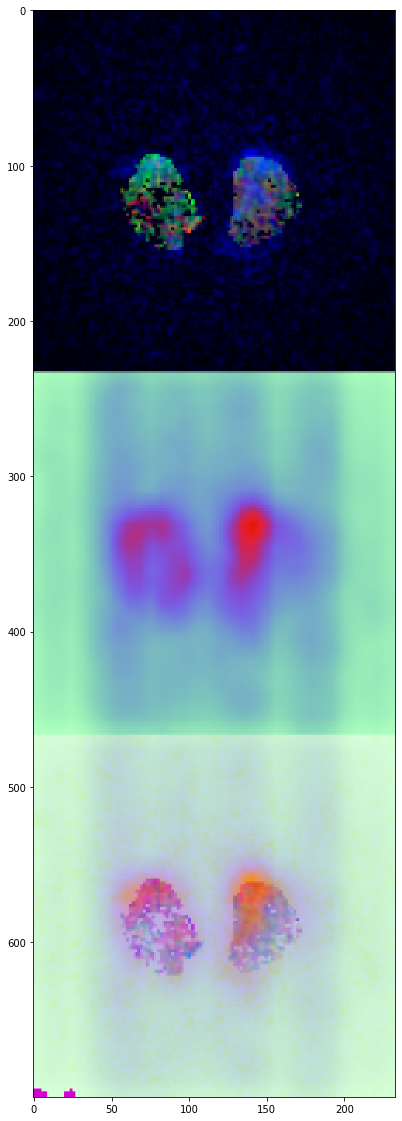

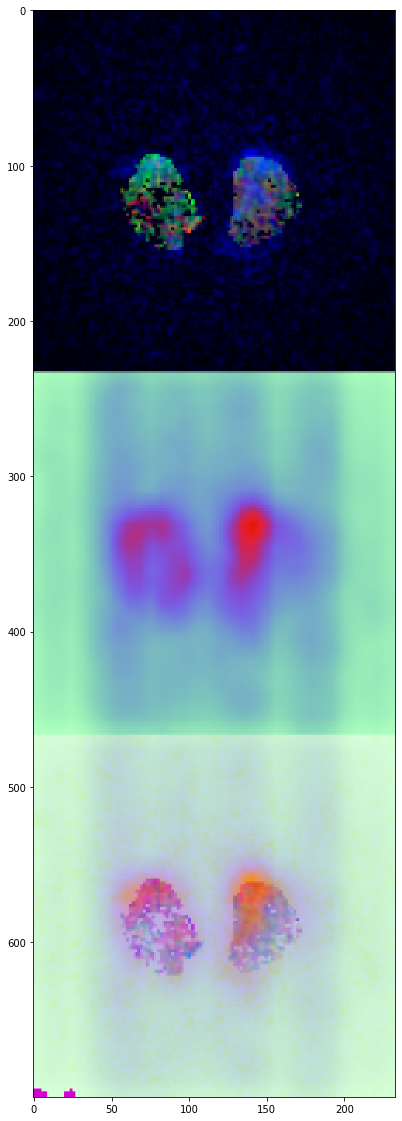

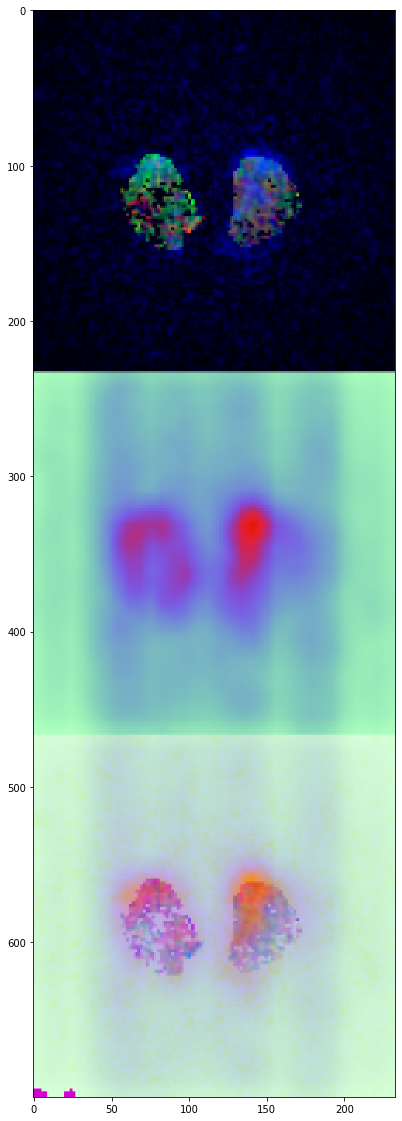

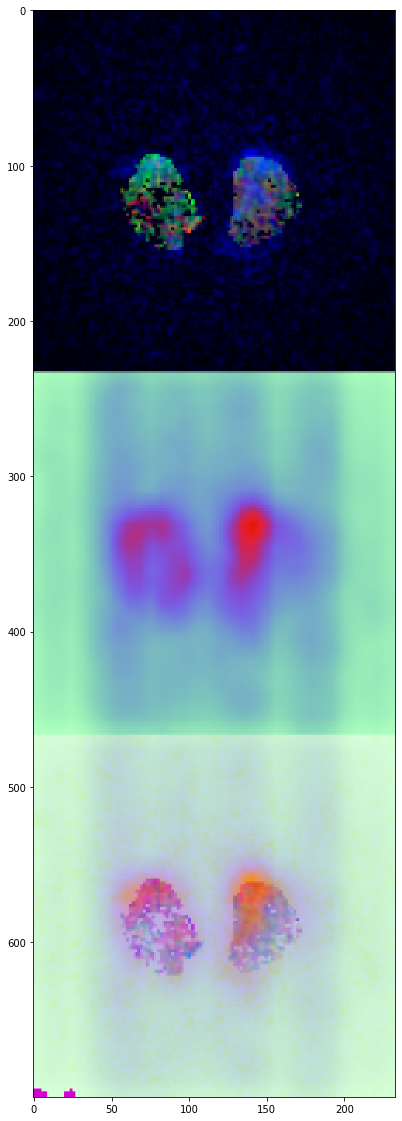

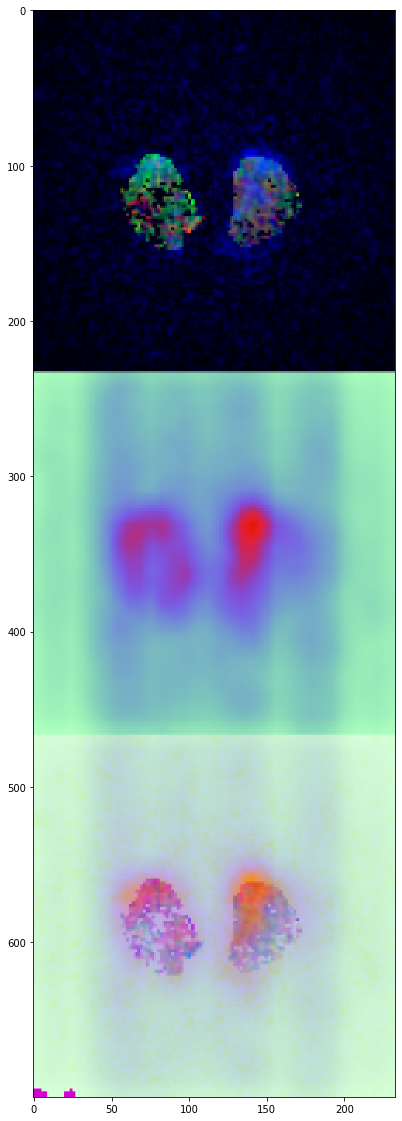

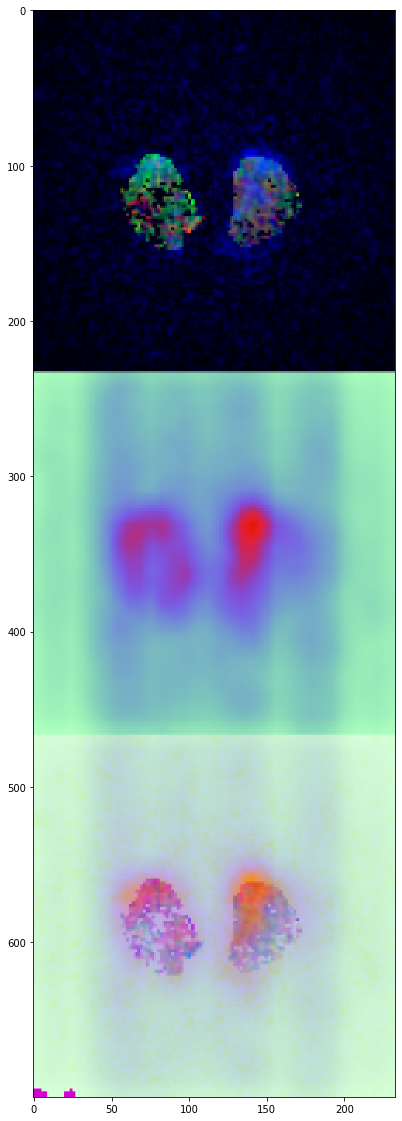

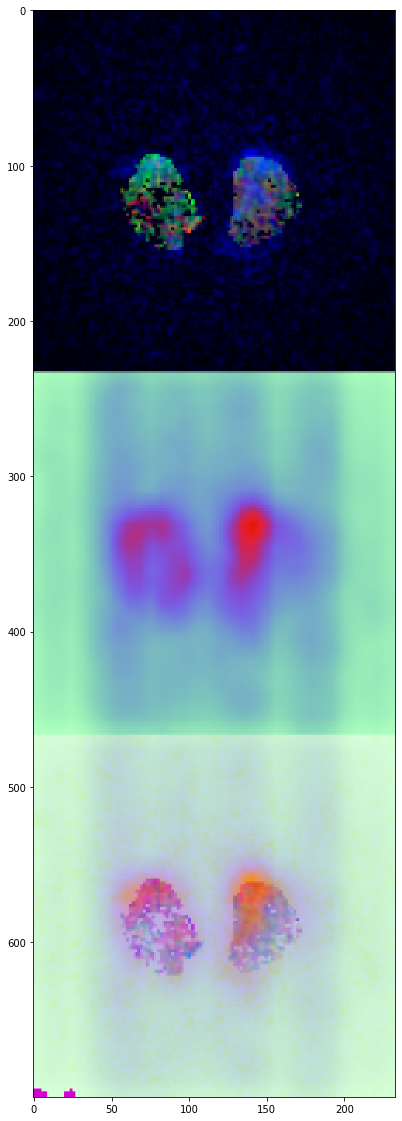

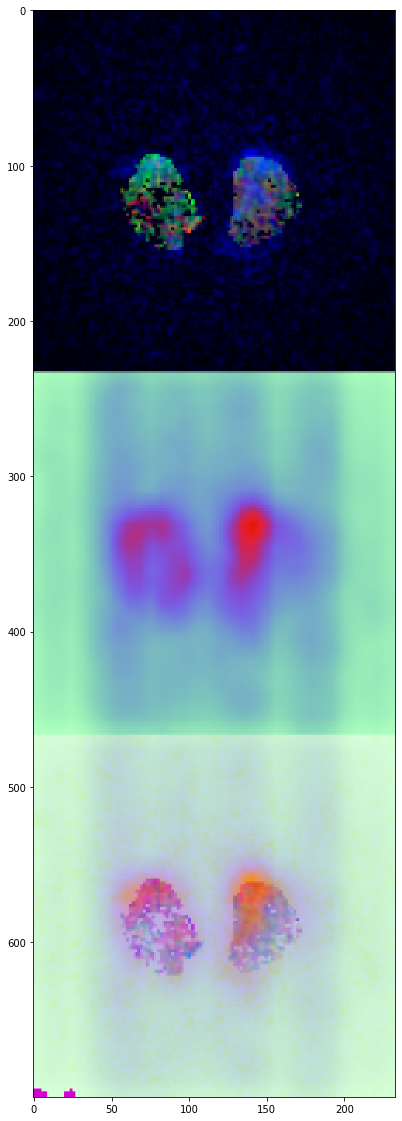

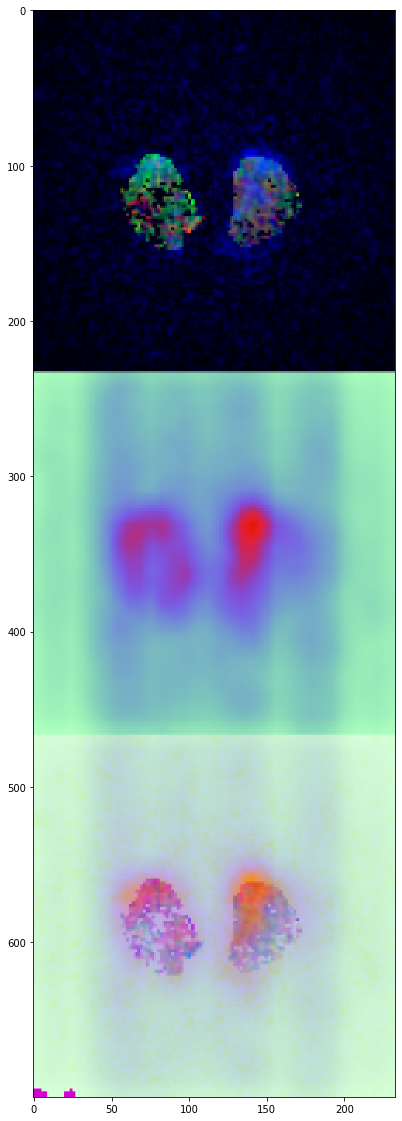

In [44]:
#from tensorflow.keras.applications import imagenet_utils
#from tensorflow.keras.applications.vgg16 import preprocess_input
import imutils
# initialize the model to be VGG16

#model = tf.keras.applications.VGG16(include_top=True, weights='imagenet')
model = model
# orig = cv2.imread('test_images/lung.png')
# image = preprocess_input(orig)
# image = cv2.resize(image,(128,128))
# image = np.expand_dims(image,axis=0)
image = x_test[20,:,:,:]
image = np.expand_dims(image,axis=0)

#print(np.max(orig))

preds = model.predict(image)
i = np.argmax(preds[0])
cam = GradCAM(model, i)
heatmap_seq = cam.compute_heatmap(image)

#heatmap_seq = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
print('image shape')
print(image.shape)
#for seq in range(num_sequence):
#    heatmap = heatmap_seq[seq,...];
#    heatmap = cv2.resize(heatmap, (image.shape[2], image.shape[3]))

(heatmap_seq, output_seq) = cam.overlay_heatmap(heatmap_seq, image, alpha=0.5)

    #cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
#cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen

num_sequence = 10;

for seq in range(num_sequence):
    orig = image[0,seq,...];
    heatmap = heatmap_seq[seq,...];
    output = output_seq[seq,...];
    heatmap = (heatmap * 255).astype("uint8")
    orig = (orig * 255).astype("uint8")
    output = (output * 255).astype("uint8")
    output = np.vstack([orig, heatmap, output])
    output = imutils.resize(output, height=700)
    plt.figure(figsize=(40,20))
    plt.imshow(output)


In [23]:
model.output

<tf.Tensor 'predictions_2/Sigmoid:0' shape=(?, 1) dtype=float32>

In [26]:
image_1 = x_train[20,:,:,:]
image_1 = np.expand_dims(image_1,axis=0)

predict = model.predict(image_1)
#print(decode_predictions(predict,top=3))
target_class = np.argmax(predict[0])
print("Target Class = %d"%target_class)
last_conv = model.get_layer('time_distributed_61')
grads = K.gradients(model.output[:,20],last_conv.output)[0]
pooled_grads = K.mean(grads,axis=(0,1,2))
iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
pooled_grads_value,conv_layer_output = iterate([image_1])
for i in range(512):
    conv_layer_output[:,:,i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output,axis=-1)

for x in range(heatmap.shape[0]):
    for y in range(heatmap.shape[1]):
        heatmap[x,y] = np.max(heatmap[x,y],0)
        
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.imshow(heatmap)

Target Class = 0


ValueError: slice index 20 of dimension 1 out of bounds. for 'strided_slice_1' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 20>, input[2] = <0 21>, input[3] = <1 1>.

In [9]:
tf.__version__

'1.14.0'

In [ ]:
model.summary()

In [5]:
attention_weight = model.layers[23].get_weights();
attention_weight= np.array(attention_weight);
print(attention_weight[6].shape)

(10, 10)


In [6]:
print(x_train.shape)

(500, 10, 28, 28, 1)


In [9]:
x_train_test = x_train[4];
x_train_test = x_train_test[...,None];
x_train_test = x_train_test.reshape([1,10,28,28,1])
layer_name='time_distributed_44';
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train_test)

In [10]:
intermediate_output.shape

(1, 10, 256)

In [11]:
attention_weight = model.layers[23].get_weights();
attention_weight= np.array(attention_weight);
w = attention_weight[0];
V = attention_weight[1];
U = attention_weight[2];
bw = attention_weight[3];
bV = attention_weight[4];
bU = attention_weight[5];


In [13]:
out_V = np.tanh(np.dot(intermediate_output,V)+bV)
out_U = 1 / (1 + np.exp((np.dot(intermediate_output,U)+bU)))

combines = out_U*out_V

total = np.exp(np.dot(combines,w)+bw);


In [14]:
total

array([[[0.27888292],
        [0.29232344],
        [0.30056024],
        [1.6314595 ],
        [0.25782824],
        [2.0507758 ],
        [0.29356933],
        [0.26084664],
        [0.40807235],
        [0.23711474]]], dtype=float32)

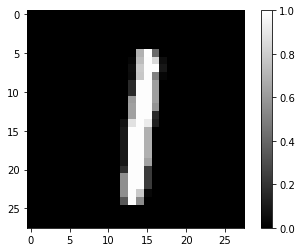

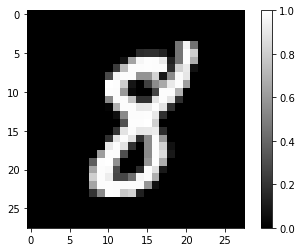

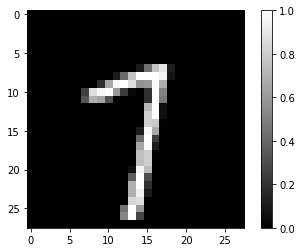

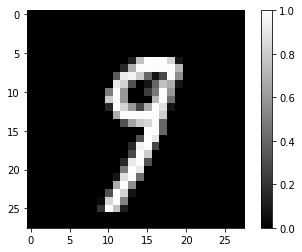

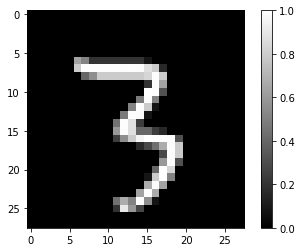

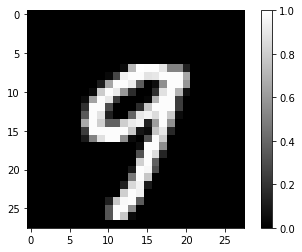

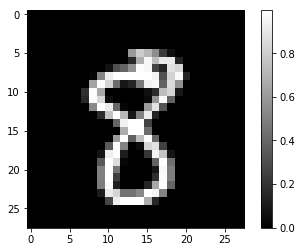

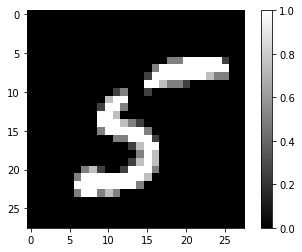

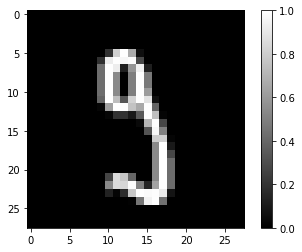

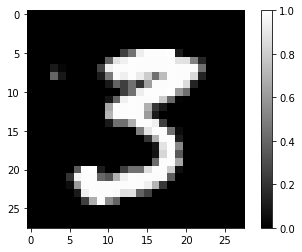

[1]


In [29]:
for xx in x_train[4]:
    xx = np.squeeze(xx)
    plt.imshow(xx, cmap='gray')
    plt.colorbar()
    plt.show()
print(y_train[4])

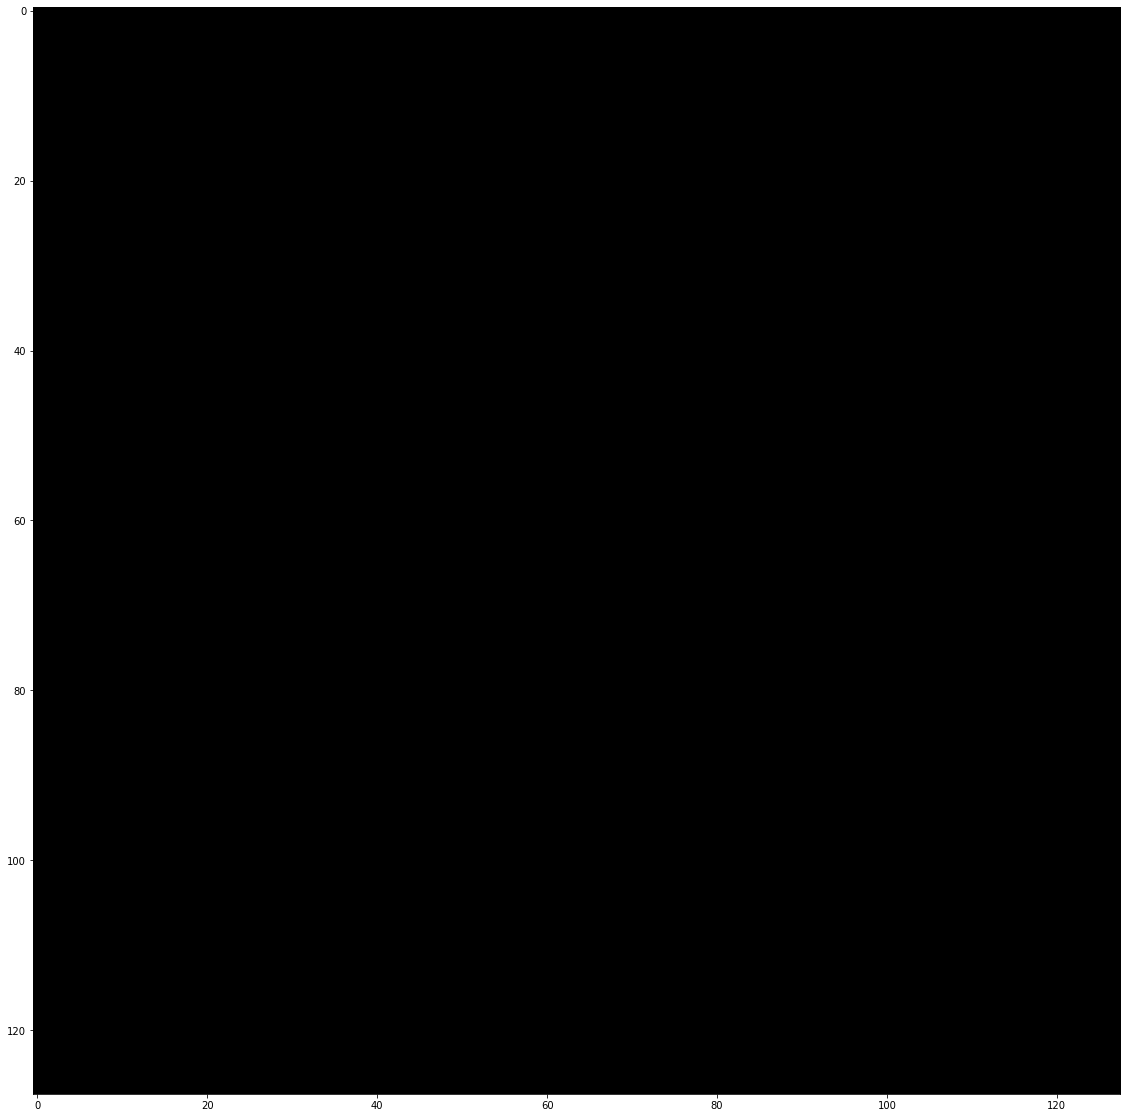

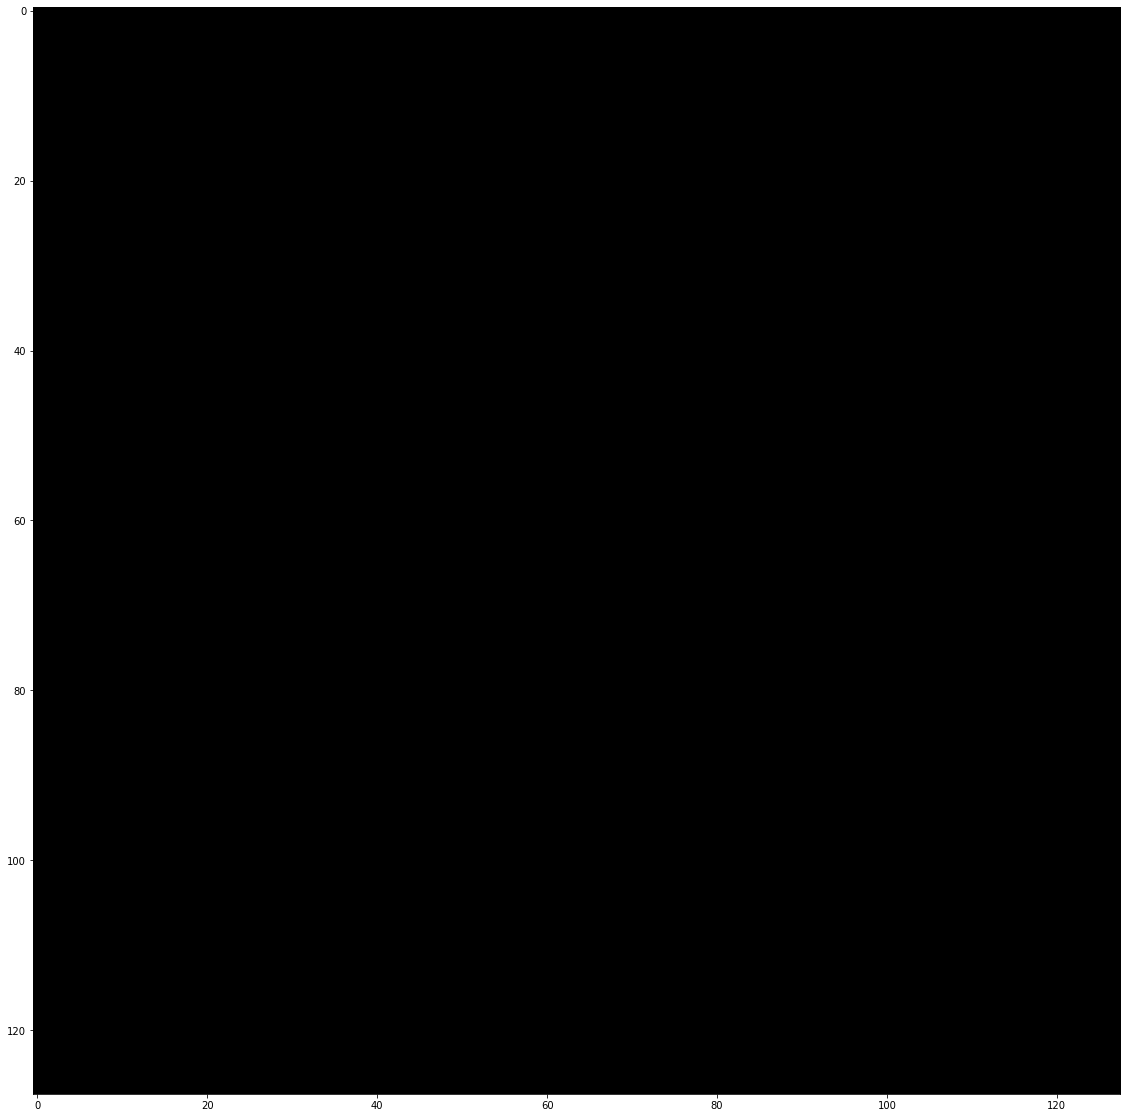

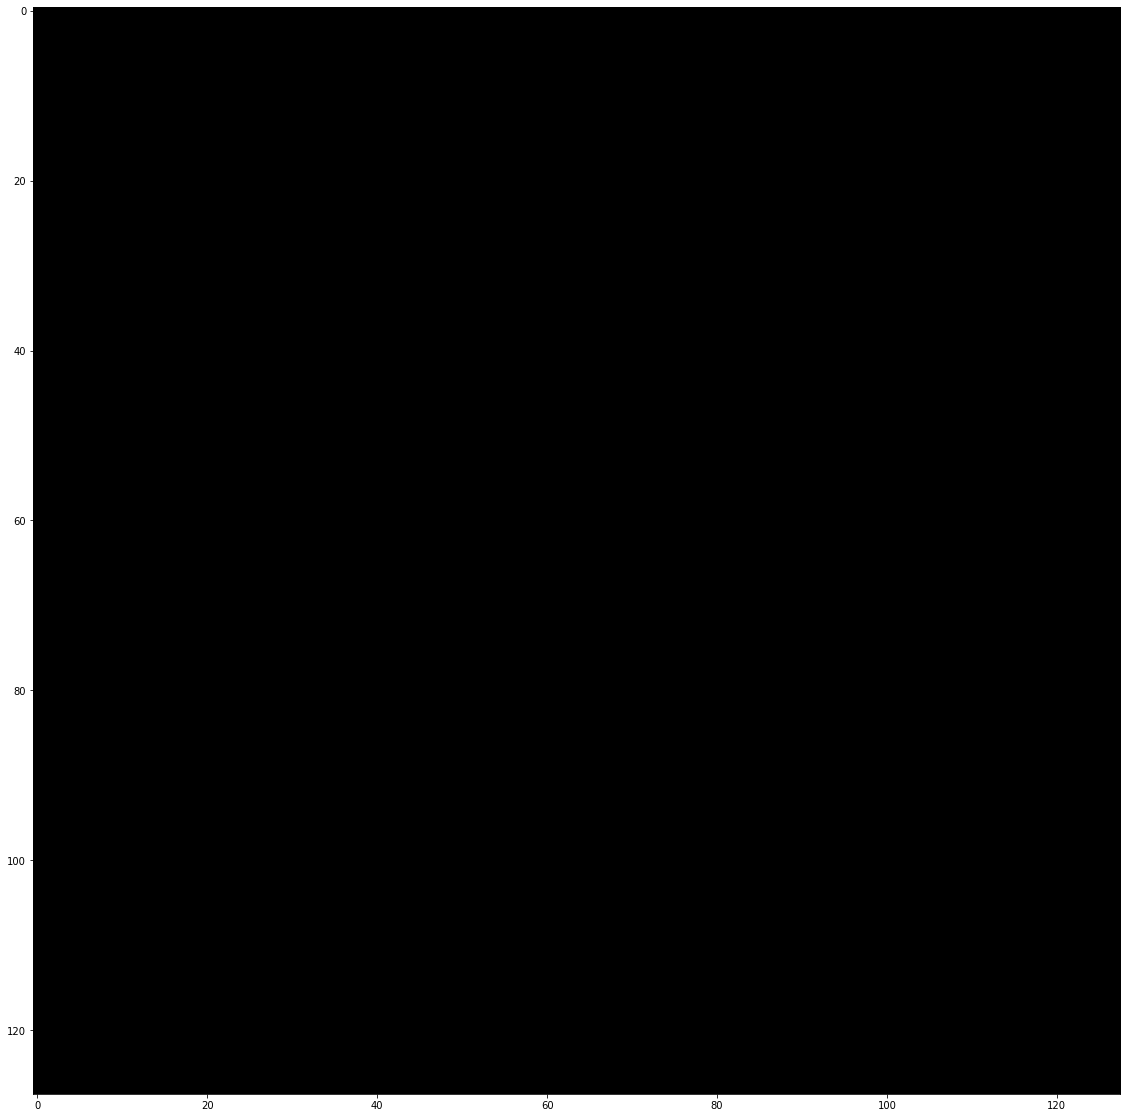

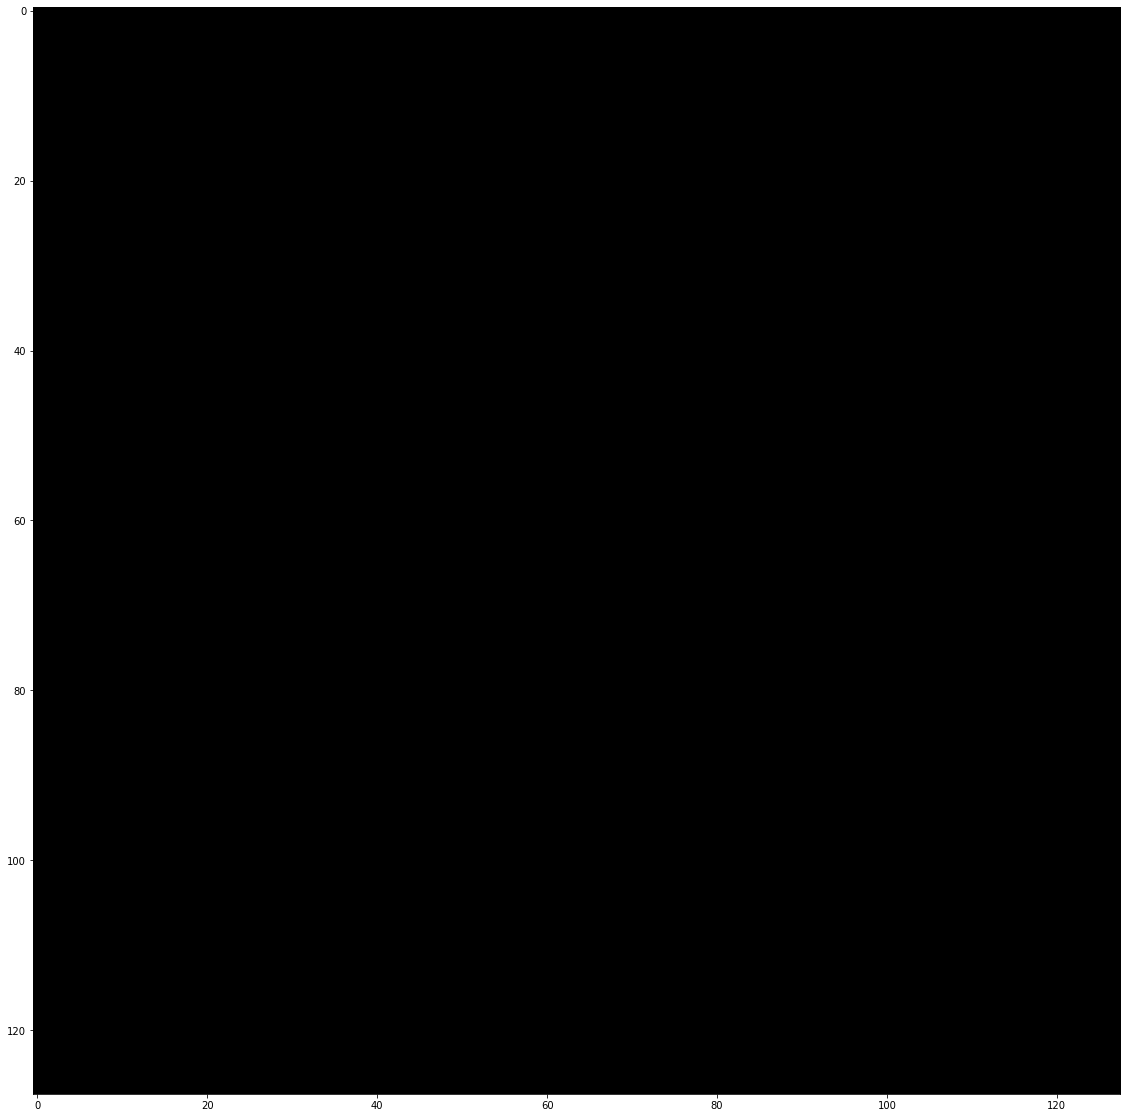

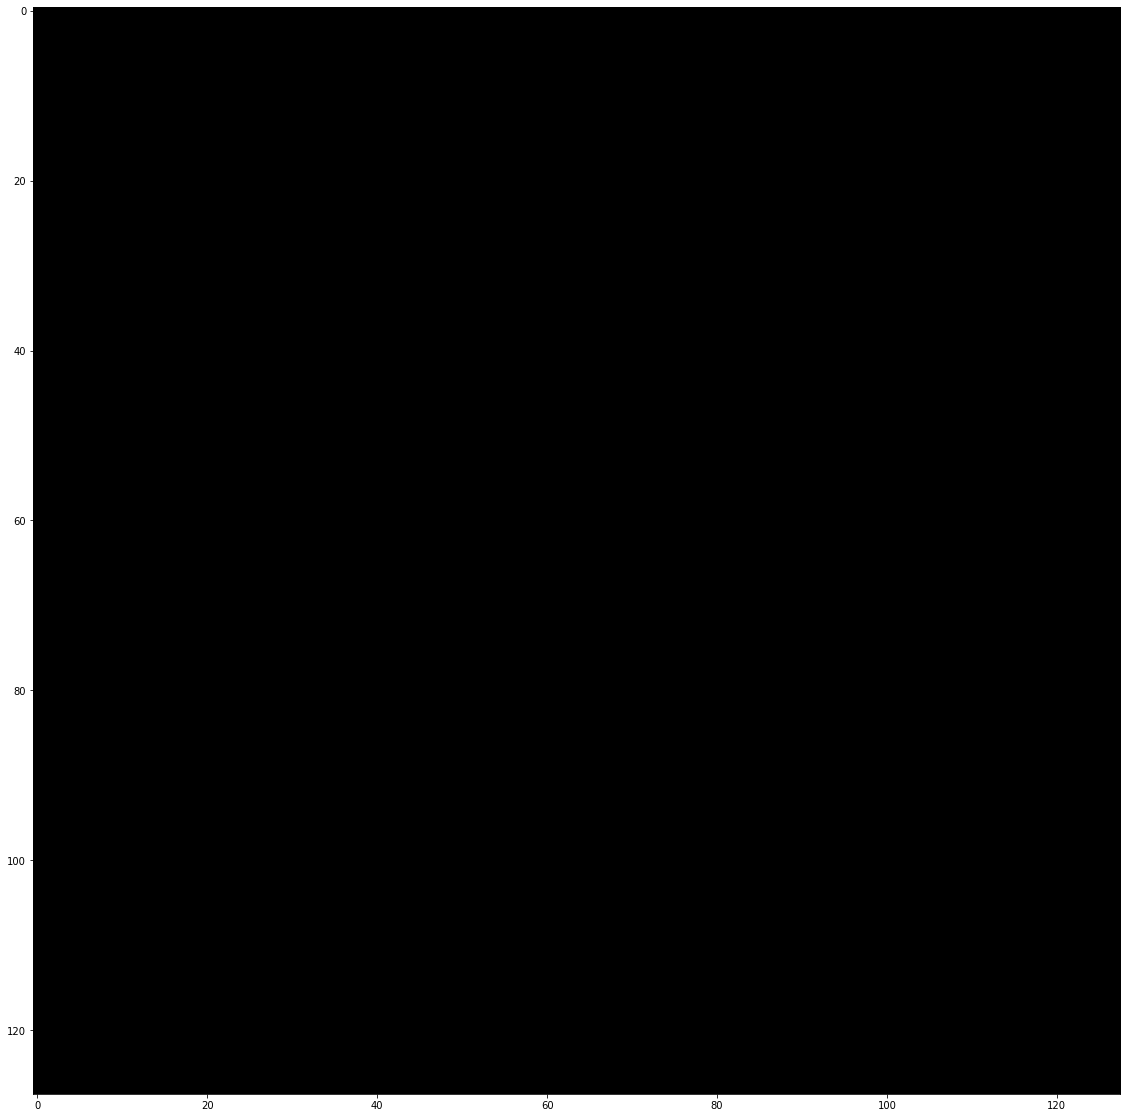

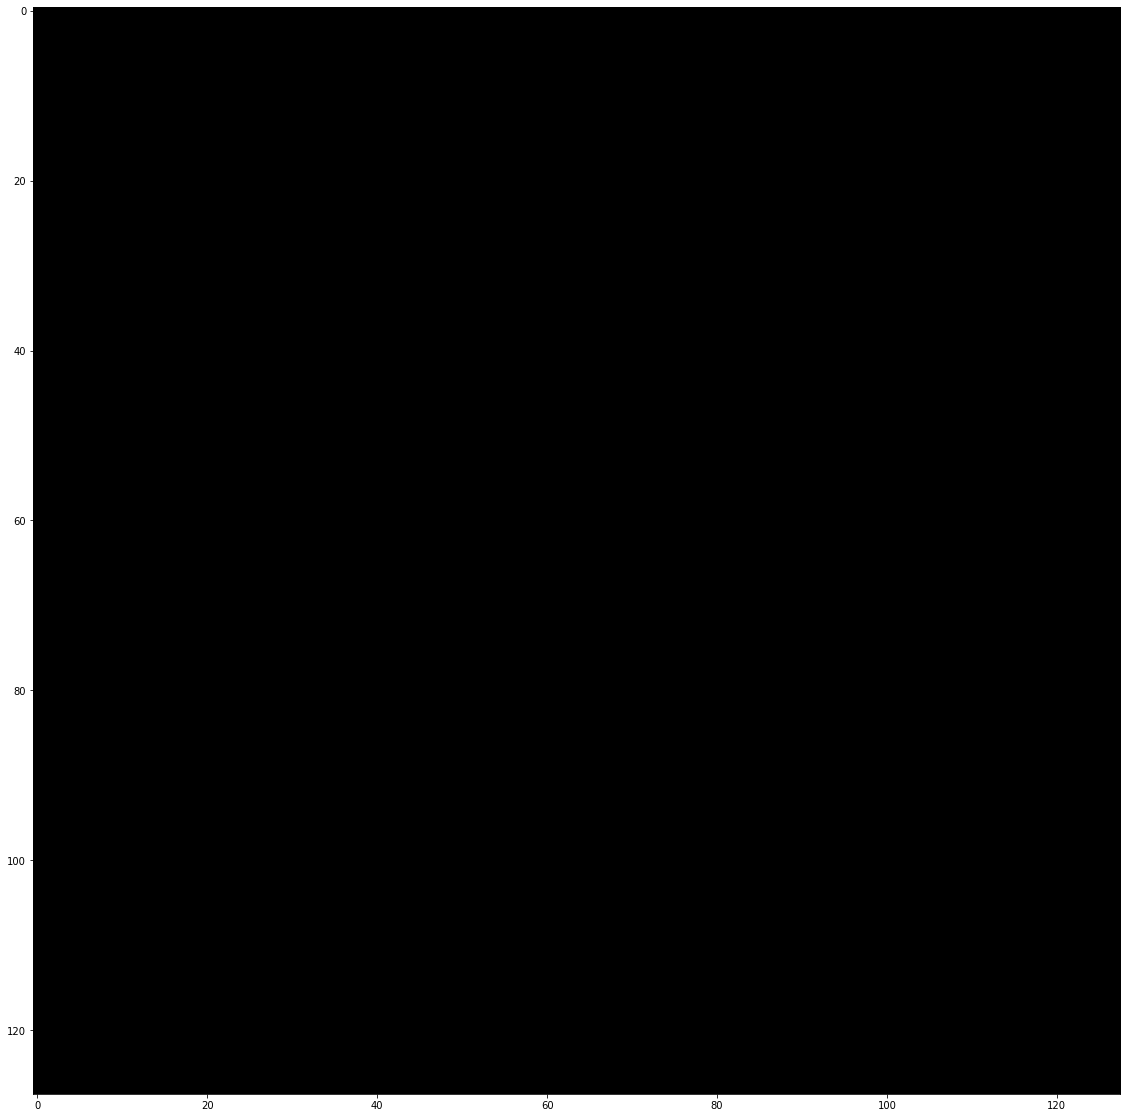

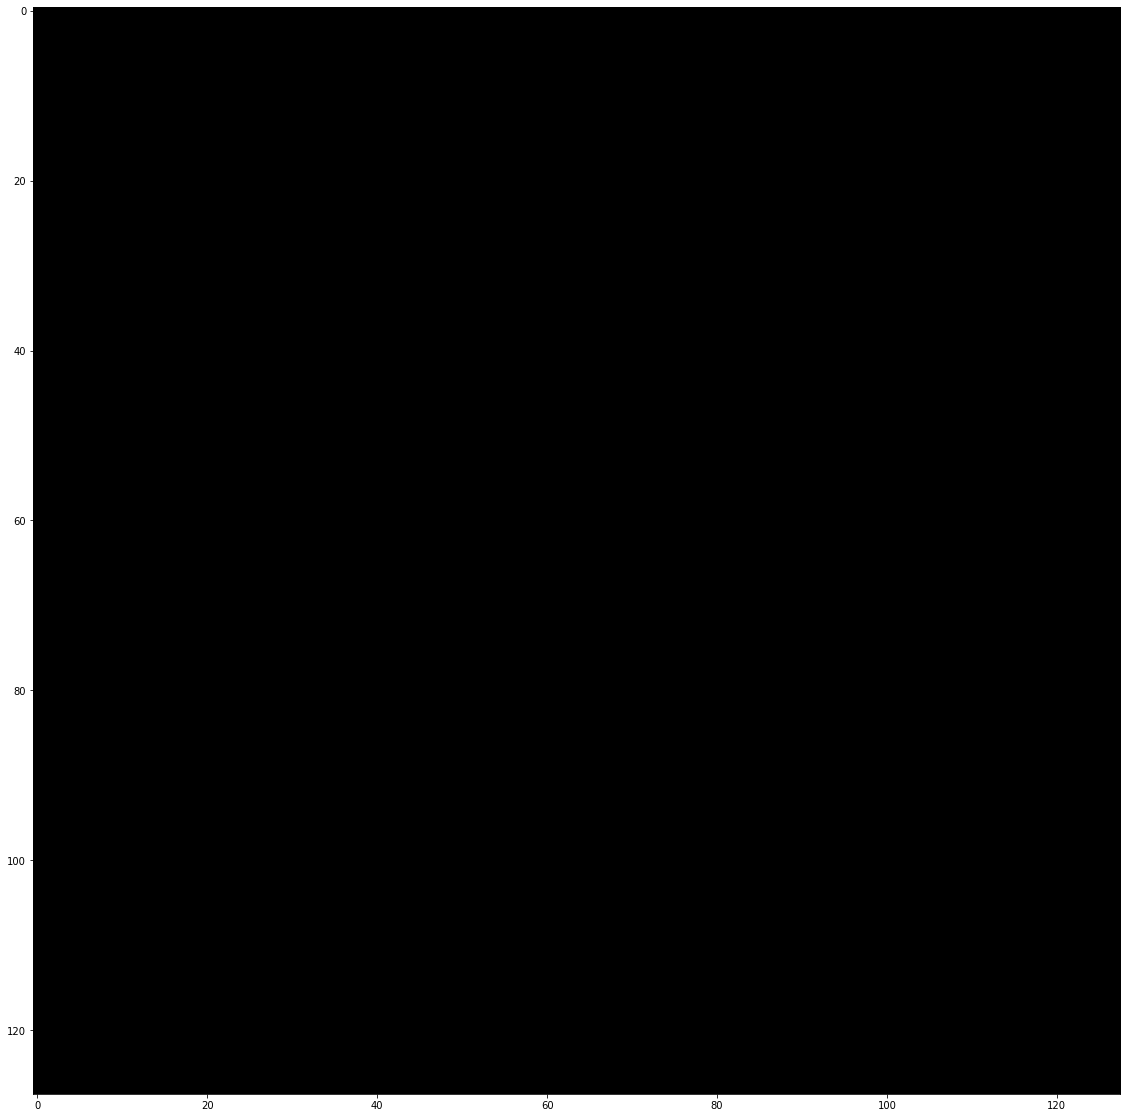

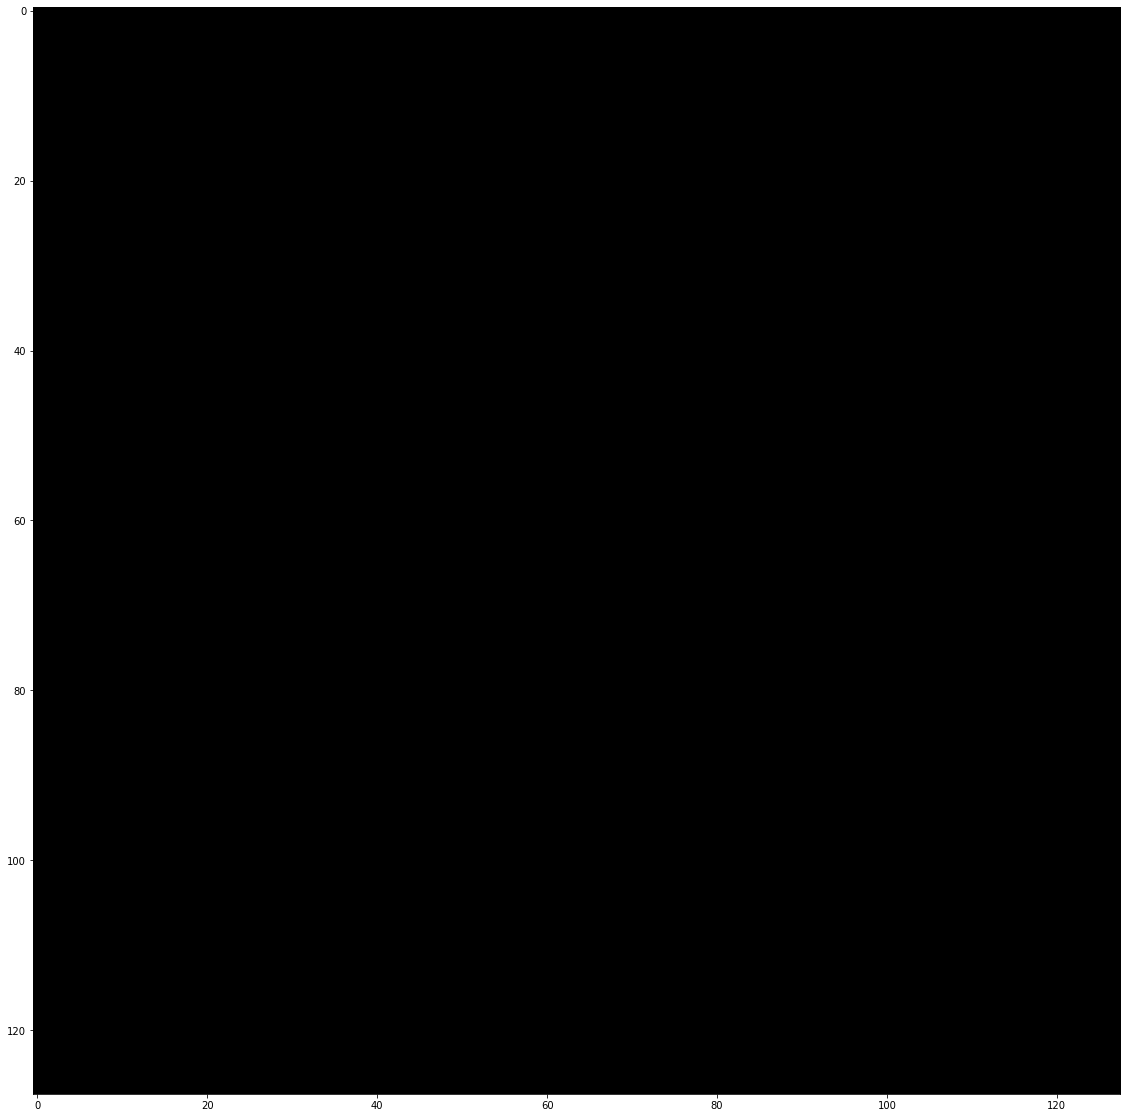

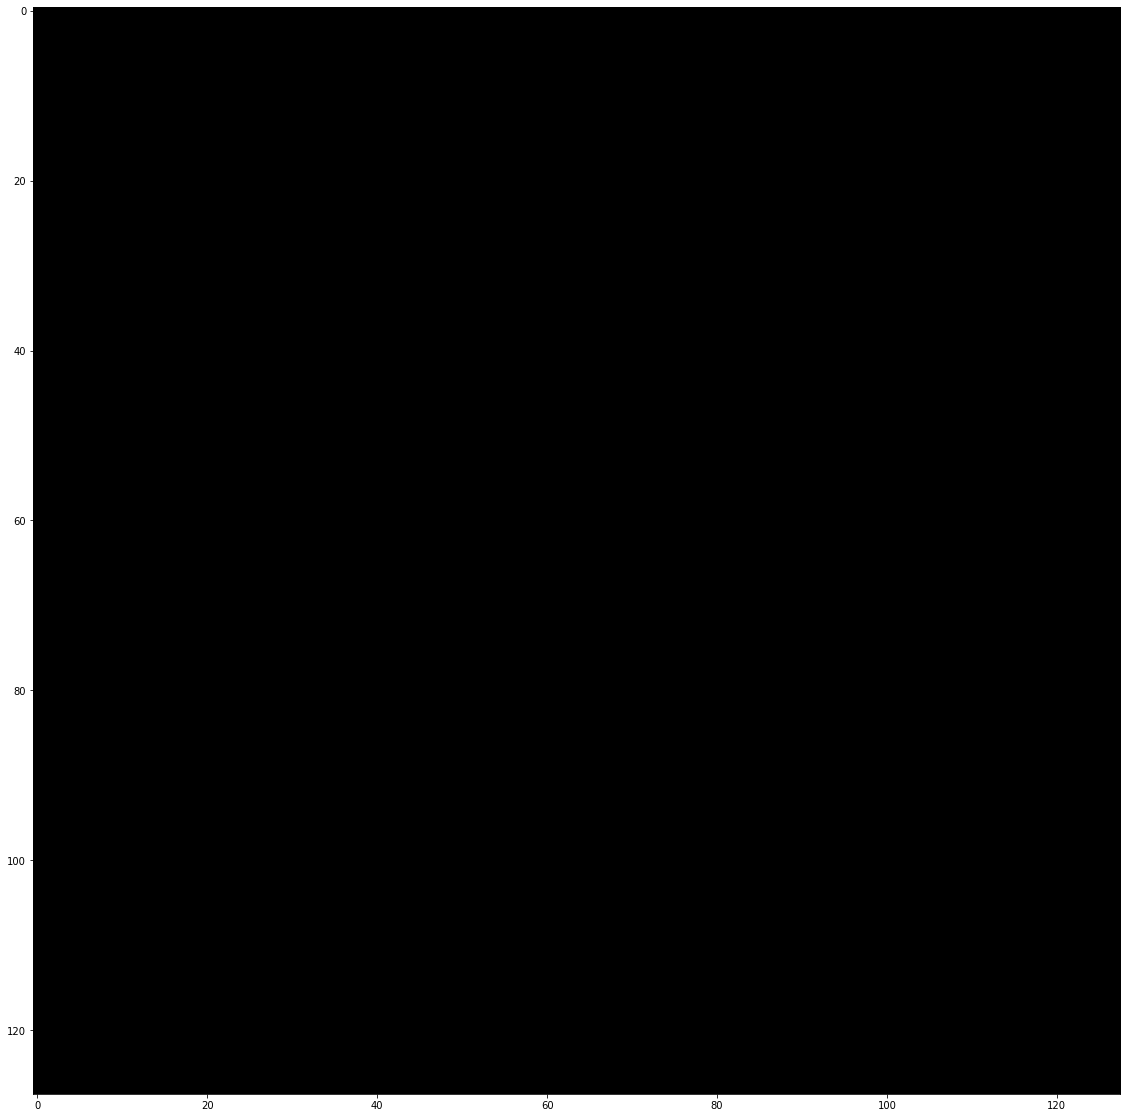

In [45]:
for seq in range(num_sequence-1):

    heatmap = heatmap_seq[seq,...];

    heatmap = (heatmap * 255).astype("uint8")
    
    heatmap2 = heatmap_seq[seq+1,...];

    heatmap2 = (heatmap2 * 255).astype("uint8")
    
    heatmap = heatmap-heatmap2;
    heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap)-np.min(heatmap))
    heatmap = (heatmap * 255).astype("uint8")
    plt.figure(figsize=(40,20))
    plt.imshow(heatmap)

In [42]:
np.sum(heatmap_seq[0,...]-heatmap_seq[20,...])

-9404.0

In [20]:
#from tensorflow.keras.applications import imagenet_utils
#from tensorflow.keras.applications.vgg16 import preprocess_input
import imutils
# initialize the model to be VGG16

#model = tf.keras.applications.VGG16(include_top=True, weights='imagenet')
model = model
# orig = cv2.imread('test_images/lung.png')
# image = preprocess_input(orig)
# image = cv2.resize(image,(128,128))
# image = np.expand_dims(image,axis=0)
image = x_test[20,:,:,:]
image = np.expand_dims(image,axis=0)

#print(np.max(orig))

preds = model.predict(image)
i = np.argmax(preds[0])
cam = GradCAM(model, i)
heatmap_seq = cam.compute_heatmap(image)


2
2
3
3
3
5
time_distributed_41
inputs
(1, 28, 1, 16)
dot product
(1, 28, 1, 256)
tanh
(1, 28, 1, 256)
combUV
(1, 28, 1, 256)
attention_weights
(1, 28, 1, 1)
attention_weights sum
(1, 28, 1, 1)
attention_weights last
(1, 28, 1)
output
(1, 16)
*
128
128
(28, 4, 4)


In [23]:
h.shape

(28, 128, 128)

In [22]:
h= heatmap_seq[...,0]

In [28]:
np.sum(h[0,...]-h[20,...])

-92567.0

In [30]:
np.sum(h[0,...]-h[27,...])

-161393.0

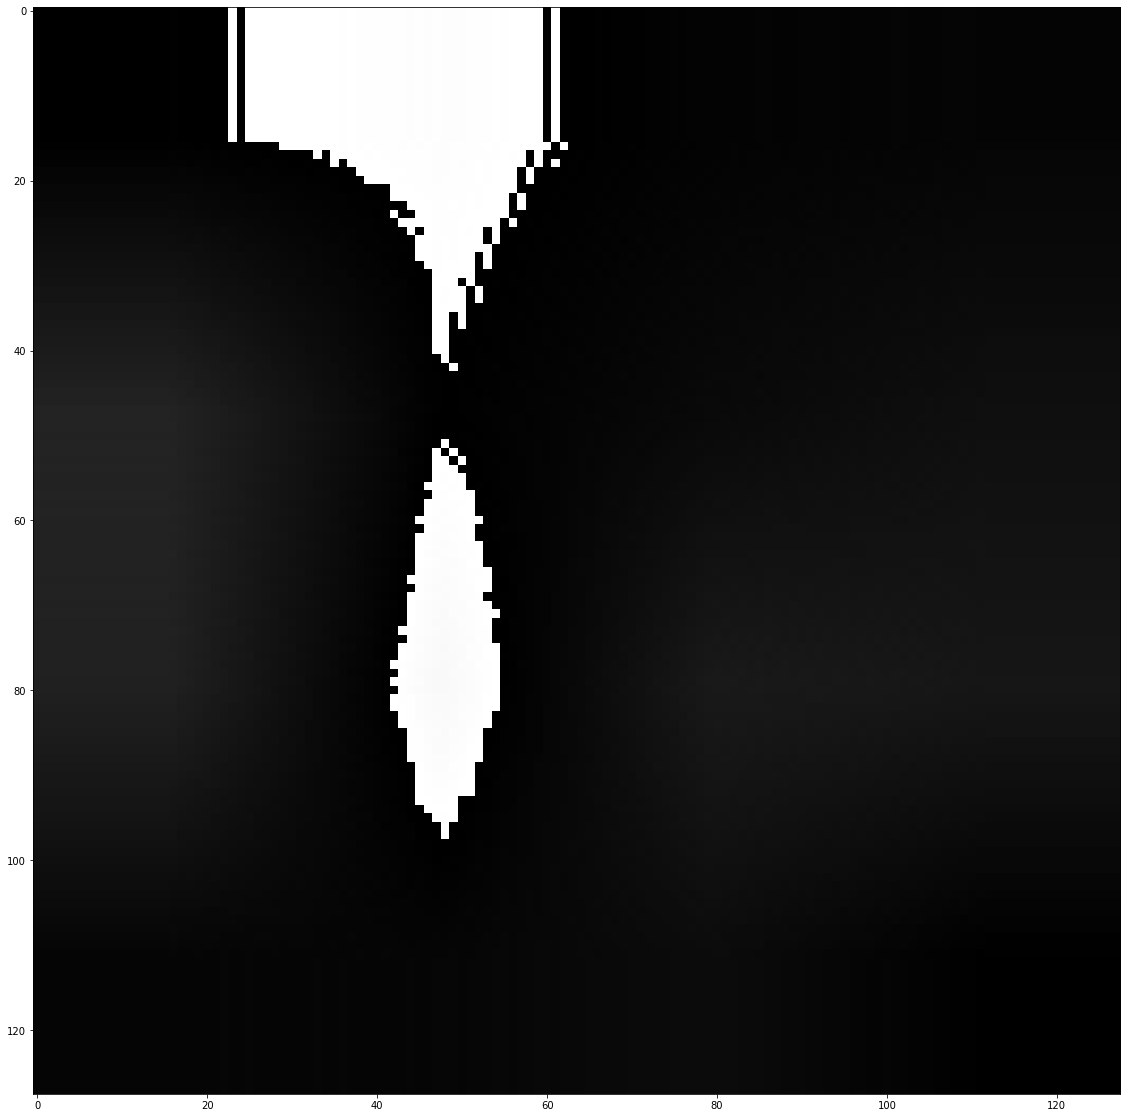

In [31]:


heatmap = heatmap_seq[0,...];

heatmap = (heatmap * 255).astype("uint8")

heatmap2 = heatmap_seq[27,...];

heatmap2 = (heatmap2 * 255).astype("uint8")

heatmap = heatmap-heatmap2;
heatmap = (heatmap-np.min(heatmap))/(np.max(heatmap)-np.min(heatmap))
heatmap = (heatmap * 255).astype("uint8")
plt.figure(figsize=(40,20))
plt.imshow(heatmap)